In [1]:
## Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.cm
from matplotlib import pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
path_name="./output/paths_sites.txt"
path = pd.read_csv(path_name, sep=',', header=None)
path = np.array(path)

cs_data_filename="Central_sulcus_original.xlsx"

cs_csv_data = pd.read_excel(cs_data_filename) # 522 subjects with all data (even from via07)
name_col = cs_csv_data["famlbnr"]

In [3]:
# format numbers
cs_csv_data["famlbnr"] = [f"{num:03d}" for num in name_col]

In [4]:
# i should clear with all data, before i removed the outliers

cs_data_mri_avail_filename = "/home/marlenesga/Documents/QA_centralSulcus_nht_lkj_MSGA_latest_original.ods"
cs_data_mri_avail = pd.read_excel(cs_data_mri_avail_filename, engine = "odf")


In [5]:
data_complete = cs_csv_data.copy()
data_complete.insert(12, "sites", np.zeros(len(data_complete)))
data_complete.insert(13, "vis_QA", np.zeros(len(data_complete)))
data_complete.insert(14, "comment_nht", np.zeros(len(data_complete)))

drop_list = []
for i in range(len(data_complete)):
    for j in range(len(cs_data_mri_avail)):
        if cs_csv_data["famlbnr"][i] in cs_data_mri_avail["subjects"][j]:
            data_complete.at[i, "sites"] = cs_data_mri_avail["sites"][j]
            data_complete.at[i, "vis_QA"] = cs_data_mri_avail["vis_QA"][j]
            data_complete.at[i, "comment_nht"] = cs_data_mri_avail["comment_nht"][j]
    if data_complete["sites"][i] == 0:
        drop_list.append(i)
data_complete_avail = data_complete.drop(drop_list)

data_complete_avail.to_csv("./output/data_complete.csv",index=False)

/tmp/ipykernel_1067347/3048267236.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'DRCMR' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data_complete.at[i, "sites"] = cs_data_mri_avail["sites"][j]
/tmp/ipykernel_1067347/3048267236.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'I need help to define the left CS' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data_complete.at[i, "comment_nht"] = cs_data_mri_avail["comment_nht"][j]


In [6]:
# Duplicate each row
duplicated_rows = pd.concat([data_complete_avail, data_complete_avail], ignore_index=True)

data_dup = duplicated_rows.sort_values(by='famlbnr')

hemisphere = ["left" if i % 2 == 0 else "right" for i in range(606)]
data_dup.insert(1, "hemisphere", hemisphere)

# Reset the index
data_dup = data_dup.reset_index(drop=True)
data_dup

,famlbnr,hemisphere,HighRiskStatus_v11,MRI_age_v11,Mvmt_age_child_v11,Mvmt_bal_stsc_v11,Mvmt_bf_stscr_v11,Mvmt_hand_v11,Mvmt_hm_stscr_v11,Sex_child_v11,ehi_hand,ehi_lq_sc,ehi_tot_sc,sites,vis_QA,comment_nht
0,003,left,K,12.188912,11.586585,10.0,13.0,2.0,12.0,0.0,3.0,90.0,450.0,DRCMR,2.0,NaN
1,003,right,K,12.188912,11.586585,10.0,13.0,2.0,12.0,0.0,3.0,90.0,450.0,DRCMR,2.0,NaN
2,004,left,K,11.764545,11.690623,7.0,18.0,2.0,12.0,0.0,3.0,65.0,325.0,DRCMR,1.0,NaN
3,004,right,K,11.764545,11.690623,7.0,18.0,2.0,12.0,0.0,3.0,65.0,325.0,DRCMR,1.0,NaN
4,005,left,K,11.493498,11.362081,14.0,7.0,2.0,6.0,0.0,3.0,100.0,500.0,DRCMR,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,519,right,K,12.533881,12.528405,2.0,10.0,2.0,9.0,1.0,3.0,100.0,500.0,CFIN,2.0,NaN
602,521,left,SZ,11.118412,11.091034,6.0,7.0,1.0,6.0,1.0,2.0,-5.0,-25.0,DRCMR,2.0,NaN
603,521,right,SZ,11.118412,11.091034,6.0,7.0,1.0,6.0,1.0,2.0,-5.0,-25.0,DRCMR,2.0,NaN
604,522,left,K,12.177960,11.887748,7.0,10.0,2.0,10.0,1.0,3.0,100.0,500.0,CFIN,1.0,NaN


In [7]:
#######################
# DATA PARAMETERIZATION 
#######################

data_parameteriz = pd.read_pickle("./output/complete_dataset/stats/data_bv_full_depth_prof.pkl")
data_parameteriz

,depth,profile,depth_peaks,depth_peaks_idx,prof_peaks,prof_peaks_idx,prof_valleys,prof_valleys_idx,outlier_diff_shape,outlier_std
0,"[0.0, 2.6798714803589974, 4.875863761408255, 5...","[0.528408920063692, 0.528408920063692, 0.93600...","[16.455385521054268, 21.19591757073067]","[32, 61]",[],[],[],[],0,0
1,"[0.0, 3.74437314691022, 5.314626330335159, 6.5...","[-1.3937141060829163, -1.3937141060829163, -1....","[12.906386589165775, 18.184166335035115, 20.60...","[14, 39, 60, 85]",[],[],[],[],0,0
2,"[0.0, 4.801219159155153, 7.062155766645446, 8....","[-0.23055722402489703, -0.23055722402489703, -...","[18.410773721989244, 21.95918939250987]","[24, 63]",[],[],[],[],0,0
3,"[0.0, 1.1962197124958038, 2.2727138635964366, ...","[3.441584146939791, 3.441584146939791, 3.73009...","[10.28246707600192, 18.57964706525672, 21.4073...","[11, 36, 65]",[],[],[],[],0,0
4,"[0.0, 4.664455382560845, 5.407005259767176, 6....","[1.9839385414123532, 1.9839385414123532, 1.939...","[17.681962803937495, 22.8378850009758, 16.5323...","[33, 56, 77]",[],[],[],[],0,0
...,...,...,...,...,...,...,...,...,...,...
601,"[0.0, 3.444729914830532, 4.798183510603849, 5....","[-2.2696852684021, -2.2696852684021, -1.605817...","[14.2673891489394, 20.283825988590248]","[29, 65]",[],[],[],[],0,0
602,"[0.0, 3.342899739567656, 4.441486263967818, 5....","[0.7796842522091336, 0.7796842522091336, 1.270...","[15.696904327021912, 18.79826330719516, 21.092...","[16, 39, 63]",[],[],[],[],0,0
603,"[0.0, 5.8978423536900655, 6.838870236009825, 8...","[1.145172913869222, 1.145172913869222, 1.72128...","[19.338180151273264, 19.647852451656945]","[33, 57]",[],[],[],[],0,0
604,"[0.0, 1.41141956258798, 3.140040917904116, 4.9...","[1.0428855969355657, 1.0428855969355657, 1.169...","[12.378713115816936, 19.901381589821536, 22.38...","[20, 43, 64, 87]",[],[],[],[],0,0


In [8]:
# get max magnitude, either positive or negative

max_peak_valley = []
max_peak_valley_idx = []

for i in range(len(data_parameteriz)):
    if data_parameteriz.at[i, "prof_peaks"].any() == False:
        max_peak_valley.append(np.nan)
        max_peak_valley_idx.append(np.nan)
        continue
    max_prof = max(data_parameteriz.at[i, "prof_peaks"])
    min_prof = min(data_parameteriz.at[i, "prof_valleys"])
    if max_prof > abs(min_prof):
        max_peak_valley.append(max_prof)
        p = list(data_parameteriz.at[i,"prof_peaks"])
        idx = p.index(max_prof)
        max_peak_valley_idx.append( data_parameteriz.at[i,"prof_peaks_idx"][idx])
    elif max_prof < abs(min_prof):
        max_peak_valley.append(min_prof)
        v = list(data_parameteriz.at[i,"prof_valleys"])
        idx = v.index(min_prof)
        max_peak_valley_idx.append( data_parameteriz.at[i,"prof_valleys_idx"][idx] )
        
data_parameteriz.insert(8, "max_peak_valley", max_peak_valley)
data_parameteriz.insert(9, "max_peak_valley_idx", max_peak_valley_idx)

In [9]:
count_peaks_valley = []
#count_peaks_valley_large = []

for i in range(len(data_parameteriz)):
    count = len(data_parameteriz.at[i,"prof_valleys_idx"]) + len(data_parameteriz.at[i,"prof_peaks_idx"])
    count_peaks_valley.append(count)

max_depth = []
for i in range(len(data_parameteriz)):
    d = max(data_parameteriz.at[i, "depth_peaks"])
    max_depth.append(d)

data_parameteriz.insert(10, "count_peaks_valley", count_peaks_valley)
data_parameteriz.insert(11, "max_depth", max_depth)

In [12]:
# get max peak in first half of the sulcus

max_peak_first_half = []
max_valley_first_half = []

for sulcus in range(len(data_parameteriz)):
    ######### peak
    #get max peak value between results under 50
    prof_peaks_idx = data_parameteriz.at[sulcus, "prof_peaks_idx"]
    idx_first_half = [idx for idx,val in enumerate(prof_peaks_idx) if val <= 50]

    # get max value that correspond to indices lower than 50
    if idx_first_half != []:
        max_first_half = max(data_parameteriz.at[sulcus,"prof_peaks"][idx_first_half])
        max_peak_first_half.append(max_first_half)
    else:
        max_peak_first_half.append(np.nan)

    ######## valley
    #get max valley value between results under 50
    prof_valley_idx = data_parameteriz.at[sulcus, "prof_valleys_idx"]
    idx_first_half_v = [idx for idx,val in enumerate(prof_valley_idx) if val <= 50]
    if idx_first_half_v != []:
        # get max value that correspond to indices lower than 50
        max_first_half_v = min(data_parameteriz.at[sulcus,"prof_valleys"][idx_first_half_v])
        max_valley_first_half.append(max_first_half_v)
    else:
        max_valley_first_half.append(np.nan)

#insert
data_parameteriz.insert(12, "max_peak_first_half", max_peak_first_half)
data_parameteriz.insert(13, "max_valley_first_half", max_valley_first_half)

#edit
#data_parameteriz["max_peak_first_half"] = max_peak_first_half
#data_parameteriz["max_valley_first_half"] = max_valley_first_half


In [49]:
# Concatenate along axis 1 (columns)
dataset_unit = pd.concat([data_dup, data_parameteriz], axis=1)

dataset_unit.to_pickle("./output/data_criteria123_param.pkl")
dataset_unit.to_csv("./output/data_criteria123_param.csv",index=False)
dataset_unit

,famlbnr,hemisphere,HighRiskStatus_v11,MRI_age_v11,Mvmt_age_child_v11,Mvmt_bal_stsc_v11,Mvmt_bf_stscr_v11,Mvmt_hand_v11,Mvmt_hm_stscr_v11,Sex_child_v11,...,prof_valleys,prof_valleys_idx,max_peak_valley,max_peak_valley_idx,count_peaks_valley,max_depth,max_peak_first_half,max_valley_first_half,outlier_diff_shape,outlier_std
0,003,left,K,12.188912,11.586585,10.0,13.0,2.0,12.0,0.0,...,[],[],NaN,NaN,0,21.195918,NaN,NaN,0,0
1,003,right,K,12.188912,11.586585,10.0,13.0,2.0,12.0,0.0,...,[],[],NaN,NaN,0,20.601295,NaN,NaN,0,0
2,004,left,K,11.764545,11.690623,7.0,18.0,2.0,12.0,0.0,...,[],[],NaN,NaN,0,21.959189,NaN,NaN,0,0
3,004,right,K,11.764545,11.690623,7.0,18.0,2.0,12.0,0.0,...,[],[],NaN,NaN,0,21.407314,NaN,NaN,0,0
4,005,left,K,11.493498,11.362081,14.0,7.0,2.0,6.0,0.0,...,[],[],NaN,NaN,0,22.837885,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,519,right,K,12.533881,12.528405,2.0,10.0,2.0,9.0,1.0,...,[],[],NaN,NaN,0,20.283826,NaN,NaN,0,0
602,521,left,SZ,11.118412,11.091034,6.0,7.0,1.0,6.0,1.0,...,[],[],NaN,NaN,0,21.092644,NaN,NaN,0,0
603,521,right,SZ,11.118412,11.091034,6.0,7.0,1.0,6.0,1.0,...,[],[],NaN,NaN,0,19.647852,NaN,NaN,0,0
604,522,left,K,12.177960,11.887748,7.0,10.0,2.0,10.0,1.0,...,[],[],NaN,NaN,0,22.381190,NaN,NaN,0,0


In [14]:
#####################################
# ADD ISOMAP DATA
#####################################

with open(f"/mrhome/marlenesga/Documents/output/dim10_k50_eucl_23_new_reconst/isomap_matrix_dim10_k50_eucl_23_new_reconst.npy", 'rb') as f:
    isomap_mtx = np.load(f)

dataset_unit_w_isomap = dataset_unit.copy()

for comp in range(len(isomap_mtx[1,:])): #19 components
    j=0
    dataset_unit_w_isomap.insert(30+comp, f"isomap_comp_{comp+1}", np.zeros(len(dataset_unit_w_isomap)))
    for i in range(len(dataset_unit_w_isomap)): #606 sulci
        if dataset_unit_w_isomap.at[i, "outlier_diff_shape"] == 0:
            dataset_unit_w_isomap.at[i, f"isomap_comp_{comp+1}"] = isomap_mtx[j,comp]
            j += 1
        else:
            dataset_unit_w_isomap.at[i, f"isomap_comp_{comp+1}"] = np.nan


In [15]:
dataset_unit_w_mvmt_bin = dataset_unit_w_isomap.copy()

dataset_unit_w_mvmt_bin.insert(10, "Mvmt_bal_stsc_v11_bin", np.zeros(len(dataset_unit_w_mvmt_bin)))
dataset_unit_w_mvmt_bin.insert(11, "Mvmt_bf_stscr_v11_bin", np.zeros(len(dataset_unit_w_mvmt_bin)))
dataset_unit_w_mvmt_bin.insert(12, "Mvmt_hm_stscr_v11_bin", np.zeros(len(dataset_unit_w_mvmt_bin)))

In [16]:
def binarize_mvt(data, mvmt_name, mvmt_name_bin):
    for idx, val in enumerate(data[mvmt_name]):
        if val > (np.mean(data[mvmt_name]) + (np.std(data[mvmt_name]))/2):
            data.at[idx,mvmt_name_bin] = 'high'
        elif val < (np.mean(data[mvmt_name]) - (np.std(data[mvmt_name]))/2):
            data.at[idx,mvmt_name_bin] = 'low'
        else:
            data.at[idx,mvmt_name_bin] = 'mid'

binarize_mvt(dataset_unit_w_mvmt_bin, 'Mvmt_bal_stsc_v11', 'Mvmt_bal_stsc_v11_bin')
binarize_mvt(dataset_unit_w_mvmt_bin, 'Mvmt_bf_stscr_v11', 'Mvmt_bf_stscr_v11_bin')
binarize_mvt(dataset_unit_w_mvmt_bin, 'Mvmt_hm_stscr_v11', 'Mvmt_hm_stscr_v11_bin')

/tmp/ipykernel_1067347/3813442610.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'high' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.at[idx,mvmt_name_bin] = 'high'
/tmp/ipykernel_1067347/3813442610.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'high' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.at[idx,mvmt_name_bin] = 'high'
/tmp/ipykernel_1067347/3813442610.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'high' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.at[idx,mvmt_name_bin] = 'high'


In [17]:
dataset_unit_w_mvmt_bin

,famlbnr,hemisphere,HighRiskStatus_v11,MRI_age_v11,Mvmt_age_child_v11,Mvmt_bal_stsc_v11,Mvmt_bf_stscr_v11,Mvmt_hand_v11,Mvmt_hm_stscr_v11,Sex_child_v11,...,isomap_comp_12,isomap_comp_13,isomap_comp_14,isomap_comp_15,isomap_comp_16,isomap_comp_17,isomap_comp_18,isomap_comp_19,outlier_diff_shape,outlier_std
0,003,left,K,12.188912,11.586585,10.0,13.0,2.0,12.0,0.0,...,0.035721,-0.452041,0.880670,-0.722755,-0.247877,1.128720,0.167213,-0.350594,0,0
1,003,right,K,12.188912,11.586585,10.0,13.0,2.0,12.0,0.0,...,0.056202,-0.357871,0.195984,-2.438467,0.834821,0.511466,0.729010,-1.541064,0,0
2,004,left,K,11.764545,11.690623,7.0,18.0,2.0,12.0,0.0,...,1.664620,1.761519,0.939337,0.082482,-0.237568,-0.657095,0.318659,-1.316441,0,0
3,004,right,K,11.764545,11.690623,7.0,18.0,2.0,12.0,0.0,...,1.696116,1.512171,-0.833000,0.261811,-0.512373,0.713328,1.302730,0.142698,0,0
4,005,left,K,11.493498,11.362081,14.0,7.0,2.0,6.0,0.0,...,0.944672,-1.047894,0.460713,-0.956987,-1.285726,-0.082894,-0.879158,0.188810,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,519,right,K,12.533881,12.528405,2.0,10.0,2.0,9.0,1.0,...,-0.352158,-0.820471,-0.320339,-1.227458,-0.618391,-1.909015,0.961783,-0.696881,0,0
602,521,left,SZ,11.118412,11.091034,6.0,7.0,1.0,6.0,1.0,...,-1.704726,0.057766,-1.083894,-0.102393,0.267967,-0.327549,0.252124,-1.348282,0,0
603,521,right,SZ,11.118412,11.091034,6.0,7.0,1.0,6.0,1.0,...,-0.535746,-1.623197,1.001653,-0.367307,0.247706,0.298306,-0.453833,0.997728,0,0
604,522,left,K,12.177960,11.887748,7.0,10.0,2.0,10.0,1.0,...,0.211696,0.257399,-0.078558,-1.154984,-0.780648,-0.040316,0.005299,0.102259,0,0


In [18]:
####################################
# CLEAN FROM OUTLIERS AND NAN
####################################

dataset_unit_clean = dataset_unit_w_mvmt_bin.copy()

# drop row if nan in movement scores
dataset_unit_clean = dataset_unit_clean.dropna(subset=['Mvmt_age_child_v11', 'Mvmt_bal_stsc_v11', 'Mvmt_bf_stscr_v11', 'Mvmt_hand_v11', 'Mvmt_hm_stscr_v11'])

# no outliers (inclides all criteria)
dataset_unit_clean = dataset_unit_clean[dataset_unit_clean.outlier_diff_shape != 1]
dataset_unit_clean = dataset_unit_clean[dataset_unit_clean.outlier_std != 1]

# criteria 2 and 3 data
df_crit23 = dataset_unit_clean[dataset_unit_clean.vis_QA != 1]


In [20]:
dataset_unit_w_mvmt_bin.to_csv("./output/dataset_unit.csv",index=False)

In [21]:
dataset_unit_clean.to_csv("./output/dataset_unit_clean.csv",index=False)

In [22]:
df_crit23_nanfree = df_crit23.copy()
df_crit23_nanfree.to_csv("./output/df_crit23_nanfree.csv",index=False)

In [24]:
# VISUALIZE DEPTH AND PROFILES BASED ON GROUPS

def visualize_bv_by(gname, group, subgroup1, subgroup2, subgroup3=None):

    by_1 = group.get_group(subgroup1)
    by_2 = group.get_group(subgroup2)
    if subgroup3:
        by_3 = group.get_group(subgroup3)

    coord = np.linspace(0,100, 101)

    fig, ax = plt.subplots(1, 2, figsize=(15, 6))

    %matplotlib inline
    # mean depth 
    depth_mean_subgroup1 = np.mean(by_1['depth'],  axis=0)
    ax[0].plot(coord, depth_mean_subgroup1,  color = '#2F3EEA')
    depth_mean_subgroup2 = np.mean(by_2['depth'], axis=0)
    ax[0].plot(coord, depth_mean_subgroup2, color = '#1FD082')
    if subgroup3:
        depth_mean_subgroup3 = np.mean(by_3['depth'], axis=0)
        ax[0].plot(coord, depth_mean_subgroup3)
    else:
        depth_mean_subgroup3 = []
    ax[0].title.set_text(f"Depth mean per {gname}")

    #variance
    depth_subgroup1 = np.array(by_1['depth'])
    depth_var_subgroup1 = depth_subgroup1.var()    
    ax[0].fill_between(coord, depth_mean_subgroup1-depth_var_subgroup1, depth_mean_subgroup1+depth_var_subgroup1, alpha=0.4, facecolor='blue', linestyle='--', edgecolor='blue', linewidth=2,antialiased=True)
    depth_subgroup2 = np.array(by_2['depth'])
    depth_var_subgroup2 = depth_subgroup2.var()
    ax[0].fill_between(coord, depth_mean_subgroup2-depth_var_subgroup2, depth_mean_subgroup2+depth_var_subgroup2, alpha=0.4, facecolor='orange', edgecolor='orange', linewidth=2, antialiased=True)
    if subgroup3:
        depth_subgroup3 = np.array(by_3['depth'])
        depth_var_subgroup3 = depth_subgroup3.var()
        ax[0].fill_between(coord, depth_mean_subgroup3-depth_var_subgroup3, depth_mean_subgroup3+depth_var_subgroup3, alpha=0.3, facecolor='white', edgecolor='black', linewidth=2, antialiased=True)

    # mean profile 
    prof_mean_subgroup1 = np.mean(by_1['profile'], axis=0)
    ax[1].plot(coord, prof_mean_subgroup1)
    prof_mean_subgroup2 = np.mean(by_2['profile'], axis=0)
    ax[1].plot(coord, prof_mean_subgroup2)
    if subgroup3:
        prof_mean_subgroup3 = np.mean(by_3['profile'], axis=0)
        ax[1].plot(coord, prof_mean_subgroup3)
    ax[1].title.set_text(f"Profile mean per {gname}")
    
    #variance
    profile_subgroup1 = np.array(by_1['profile'])
    prof_var_subgroup1 = profile_subgroup1.std()
    ax[1].fill_between(coord, prof_mean_subgroup1-prof_var_subgroup1, prof_mean_subgroup1+prof_var_subgroup1, alpha=0.4, facecolor='blue', linestyle='--', edgecolor='blue', linewidth=2, antialiased=True)
    profile_subgroup2 = np.array(by_2['profile'])
    prof_var_subgroup2 = profile_subgroup2.std()
    ax[1].fill_between(coord, prof_mean_subgroup2-prof_var_subgroup2, prof_mean_subgroup2+prof_var_subgroup2, alpha=0.4, facecolor='orange', linestyle='-', edgecolor='orange', linewidth=2, antialiased=True)
    if subgroup3:
        profile_subgroup3 = np.array(by_3['profile'])
        prof_var_subgroup3 = profile_subgroup3.std()
        ax[1].fill_between(coord, prof_mean_subgroup3-prof_var_subgroup3, prof_mean_subgroup3+prof_var_subgroup3, alpha=0.3, facecolor='white', edgecolor='black', linewidth=2, antialiased=True)
    else:
        prof_mean_subgroup3 = []

    return depth_mean_subgroup1, depth_mean_subgroup2, depth_mean_subgroup3, prof_mean_subgroup1, prof_mean_subgroup2, prof_mean_subgroup3

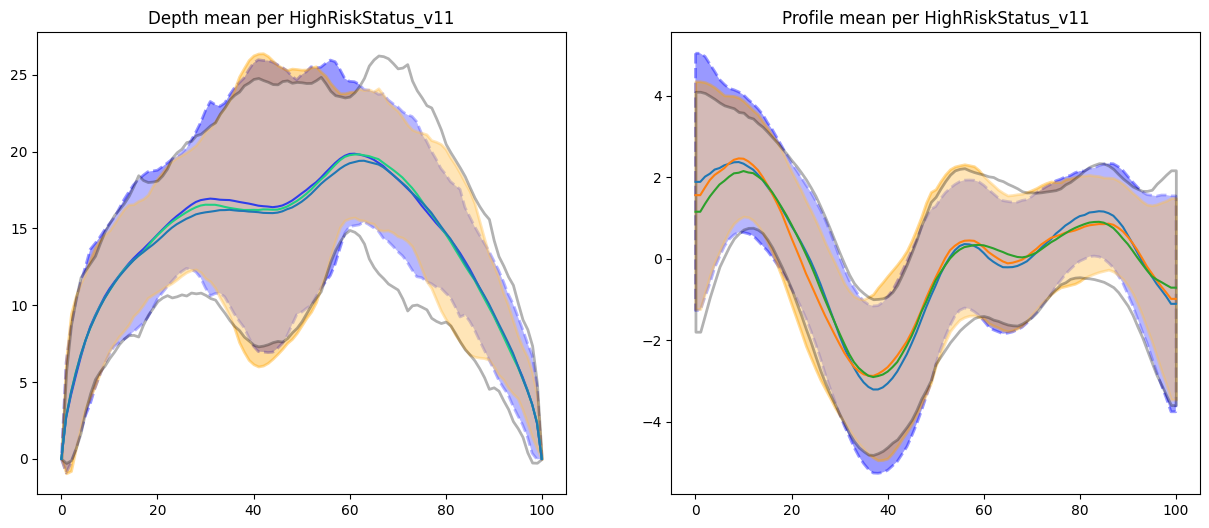

In [25]:
df_gby_riskg = df_crit23_nanfree.groupby('HighRiskStatus_v11')

depth_m1, depth_m2, depth_m3, prof_m1, prof_m2, prof_m3 = visualize_bv_by('HighRiskStatus_v11',df_gby_riskg, 'SZ','BP','K')

In [26]:
df_gby_riskg.describe()

MRI_age_v11                                             \
                         count       mean       std        min        25%   
HighRiskStatus_v11                                                          
BP                        80.0  12.093292  0.282534  11.394935  11.933607   
K                        126.0  12.171137  0.252733  11.490760  11.996578   
SZ                       110.0  12.096173  0.279731  11.118412  11.967830   

                                                    Mvmt_age_child_v11  \
                          50%        75%        max              count   
HighRiskStatus_v11                                                       
BP                  12.056126  12.216975  12.804928               80.0   
K                   12.186174  12.342916  12.867899              126.0   
SZ                  12.061602  12.299110  12.783025              110.0   

                               ... outlier_diff_shape      outlier_std       \
                         mean  ...                75%  max       count mean   
HighRiskStatus_v11             ...                                            
BP                  12.001711  ...                0.0  0.0        80.0  0.0   
K                   12.062427  ...                0.0  0.0       126.0  0.0   
SZ                  11.968988  ...                0.0  0.0       110.0  0.0   

                                                  
                    std  min  25%  50%  75%  max  
HighRiskStatus_v11                                
BP                  0.0  0.0  0.0  0.0  0.0  0.0  
K                   0.0  0.0  0.0  0.0  0.0  0.0  
SZ                  0.0  0.0  0.0  0.0  0.0  0.0  

[3 rows x 304 columns]

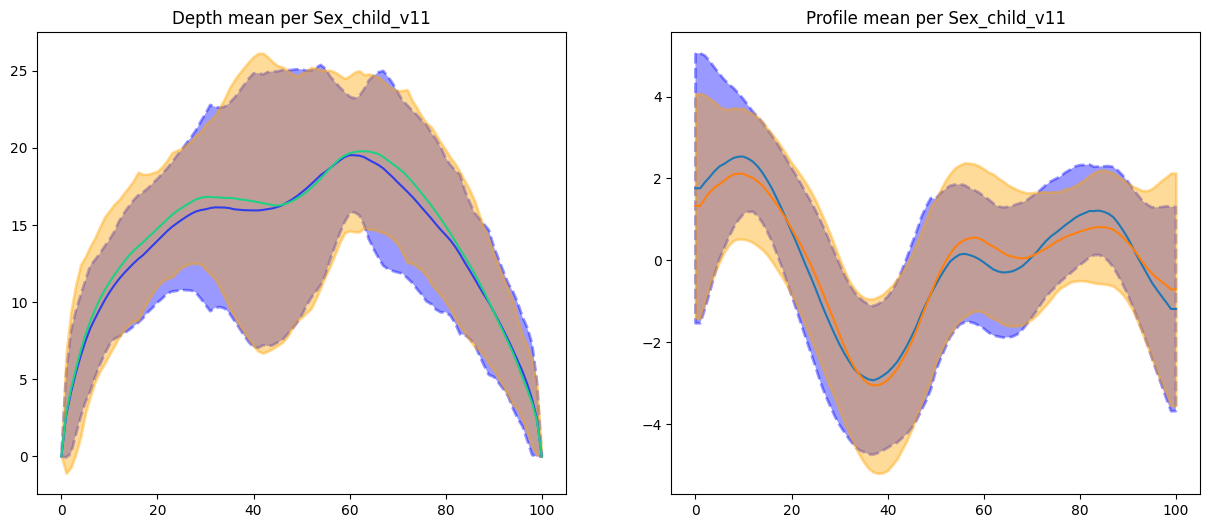

In [27]:
df_gby_sex = df_crit23_nanfree.groupby('Sex_child_v11')
# 0=female, 1=male

depth_m1, depth_m2, depth_m3, prof_m1, prof_m2, prof_m3 = visualize_bv_by('Sex_child_v11',df_gby_sex, 0.0, 1.0)

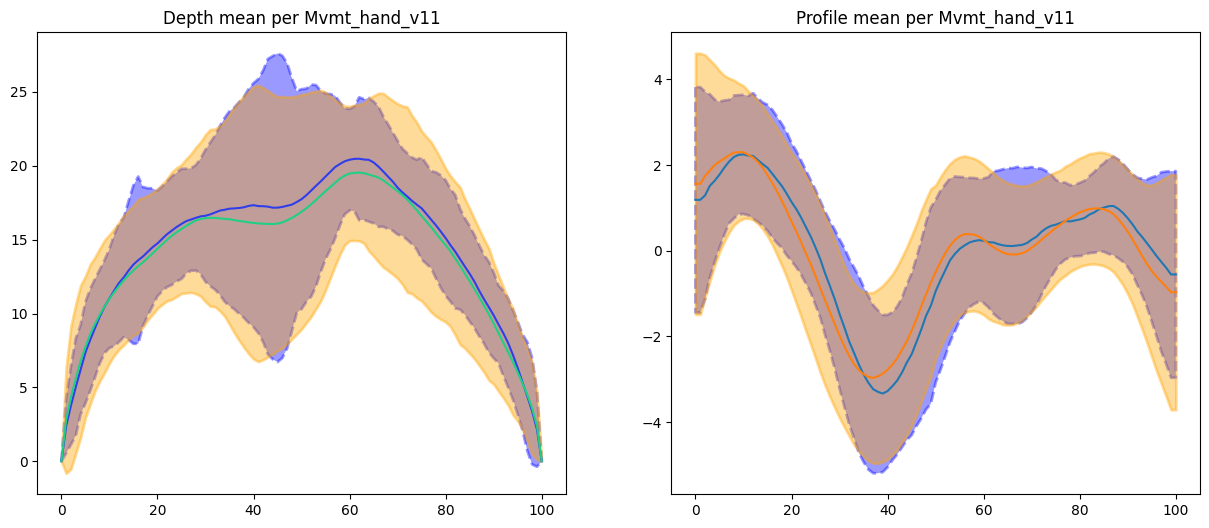

In [28]:
df_gby_handed = df_crit23_nanfree.groupby('Mvmt_hand_v11')

depth_m1, depth_m2, depth_m3, prof_m1, prof_m2, prof_m3 =  visualize_bv_by('Mvmt_hand_v11',df_gby_handed, 1.0, 2.0)

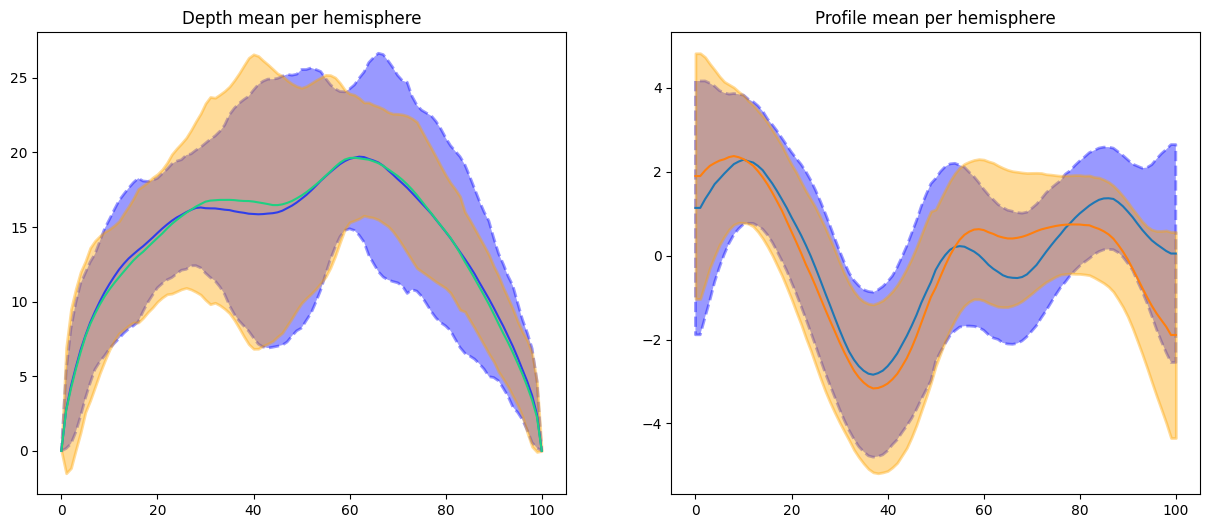

In [29]:
df_gby_hemisp = df_crit23_nanfree.groupby('hemisphere')

depth_m1, depth_m2, depth_m3, prof_m1, prof_m2, prof_m3 = visualize_bv_by('hemisphere',df_gby_hemisp, 'left', 'right')

In [108]:
# VISUALIZE DEPTH AND PROFILES BASED ON GROUPS
import seaborn as sns
matplotlib.rcParams.update({'font.size': 11})

%matplotlib tk

def visualize_bv_by_new(gname, group, var, subgroup1, subgroup2, subgroup3=None):

    by_1 = group.get_group(subgroup1)
    by_2 = group.get_group(subgroup2)
    if subgroup3:
        by_3 = group.get_group(subgroup3)

    coord = np.linspace(0,100, 101)

    fig, ax = plt.subplots(1, 1, figsize=(12, 5))

    # mean depth 
    depth_mean_subgroup1 = np.mean(by_1[var],  axis=0)
    ax.plot(coord, depth_mean_subgroup1, color = '#2F3EEA', linewidth=3)
    depth_mean_subgroup2 = np.mean(by_2[var], axis=0)
    ax.plot(coord, depth_mean_subgroup2, color = '#1FD082', linewidth=3)

    # Hide the right and top spines
    ax.spines[['right', 'top']].set_visible(False)
    plt.xticks(np.linspace(0,100,11))
    plt.legend(["left hemisphere","right hemisphere"])
    plt.xlabel("Position along CS")
    plt.grid(color='#ddd9d9')

var = 'depth'
visualize_bv_by_new('hemisphere',df_gby_hemisp, var,'left', 'right')
plt.yticks(np.linspace(0,34,16))
plt.ylabel("Mean Sulcal Depth")
var = 'profile'
visualize_bv_by_new('hemisphere',df_gby_hemisp, var,'left', 'right')
plt.yticks(np.linspace(-4,7,16))
plt.ylabel("Mean Sulcal Profile")


Text(0, 0.5, 'Mean Sulcal Profile')

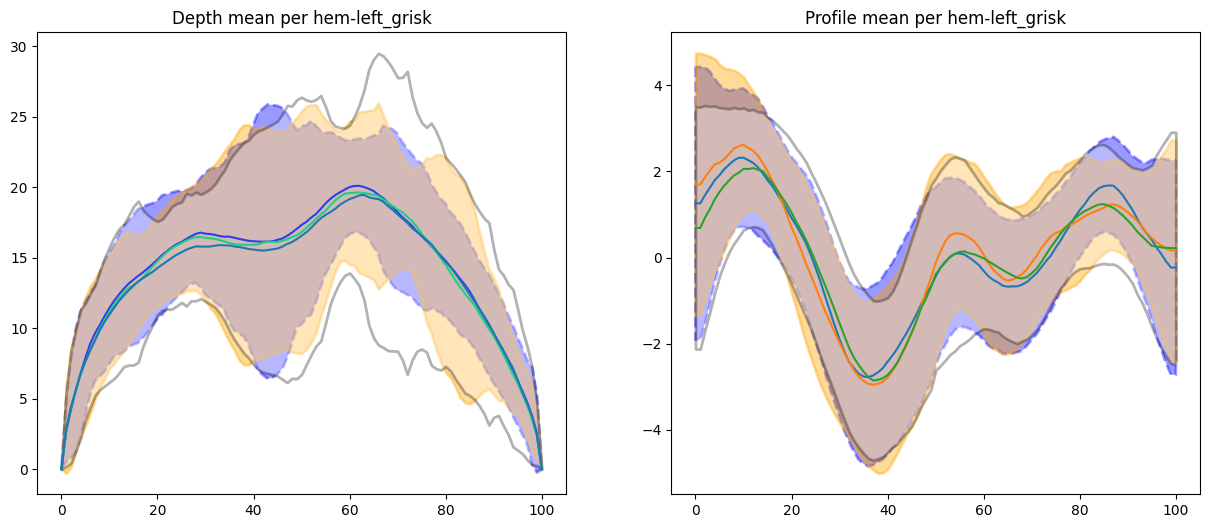

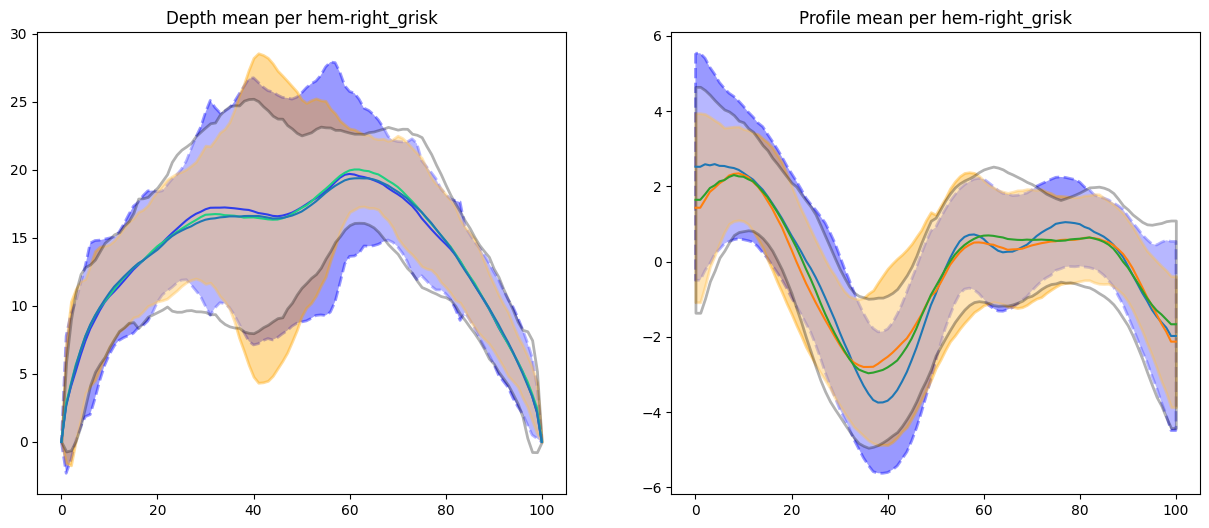

In [73]:
by_sidehanded = df_gby_handed.get_group(2.0) # right handers

df_gby_hemisp_ = by_sidehanded.groupby('hemisphere')

# remove _ to go back
by_left = df_gby_hemisp.get_group('left')
by_right = df_gby_hemisp.get_group('right')

df_gby_left_grisk = by_left.groupby('HighRiskStatus_v11')

depth_m1, depth_m2, depth_m3, prof_m1, prof_m2, prof_m3 = visualize_bv_by('hem-left_grisk',df_gby_left_grisk, 'SZ', 'BP', 'K')
plt.show()

df_gby_right_grisk = by_right.groupby('HighRiskStatus_v11')

depth_m1, depth_m2, depth_m3, prof_m1, prof_m2, prof_m3 = visualize_bv_by('hem-right_grisk',df_gby_right_grisk, 'SZ', 'BP', 'K')

plt.show()

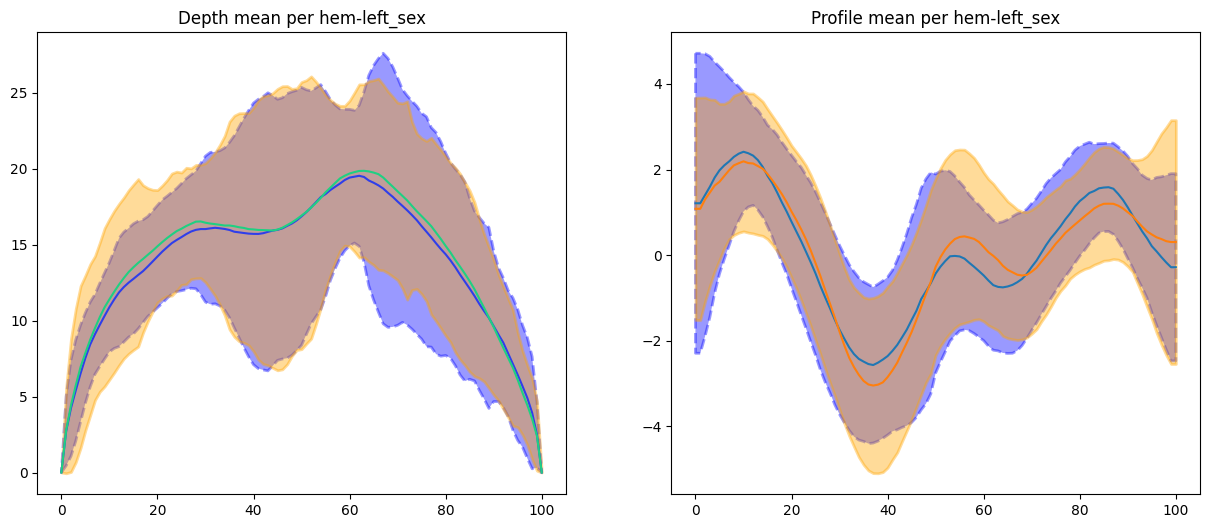

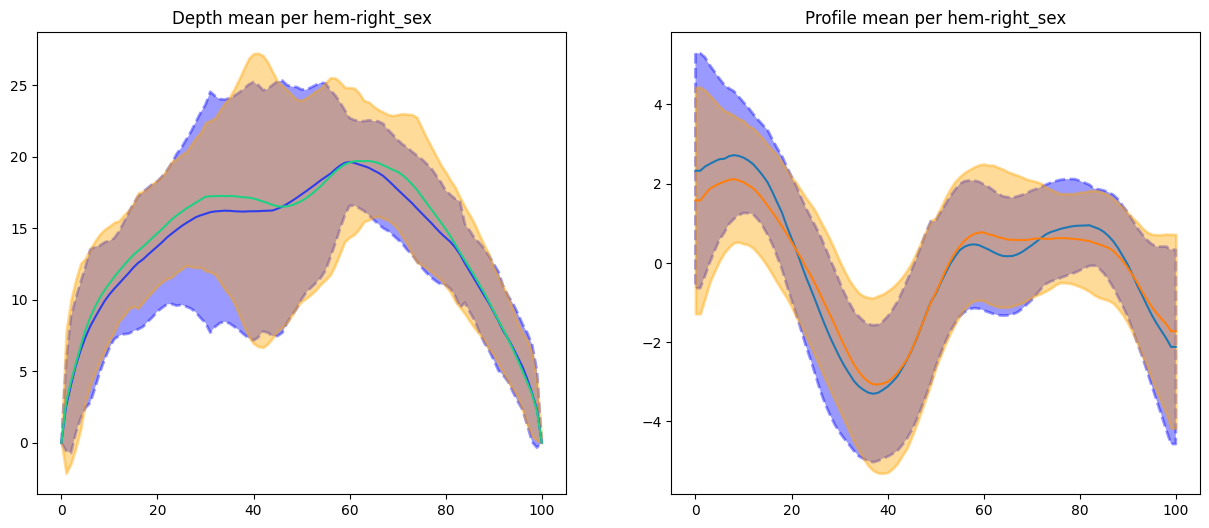

In [32]:
df_gby_left_sex = by_left.groupby('Sex_child_v11')

visualize_bv_by('hem-left_sex',df_gby_left_sex, 0.0, 1.0)
plt.show()

df_gby_right_sex = by_right.groupby('Sex_child_v11')

visualize_bv_by('hem-right_sex',df_gby_right_sex, 0.0, 1.0)
plt.show()
0=female, 1=male

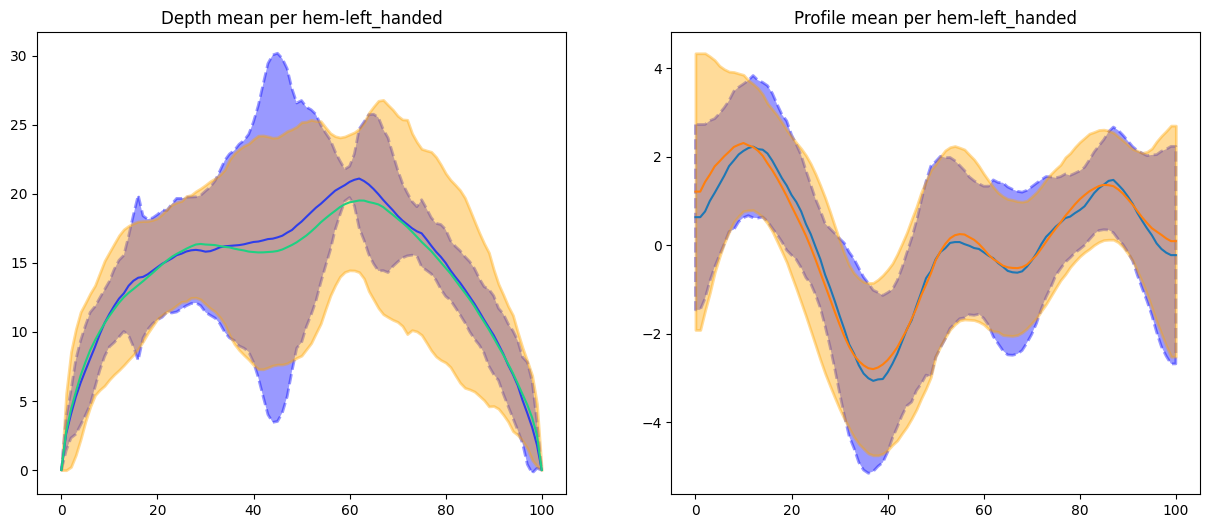

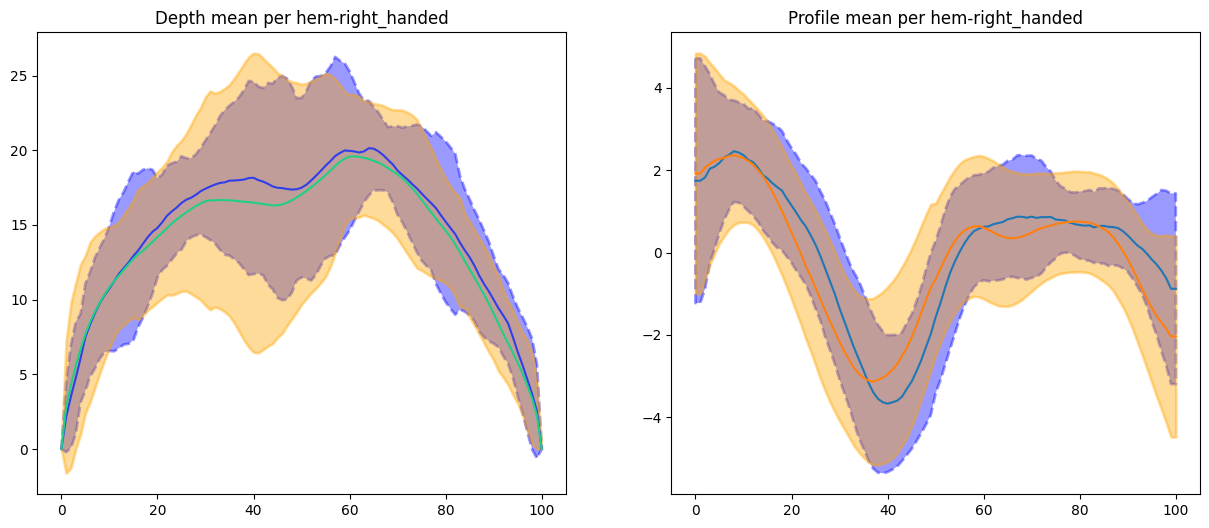

In [33]:
df_gby_left_handed = by_left.groupby('Mvmt_hand_v11')

# 1=left hand, 2=right hand
visualize_bv_by('hem-left_handed',df_gby_left_handed, 1.0, 2.0)
plt.show()

df_gby_right_handed = by_right.groupby('Mvmt_hand_v11')

visualize_bv_by('hem-right_handed',df_gby_right_handed, 1.0, 2.0)
plt.show()

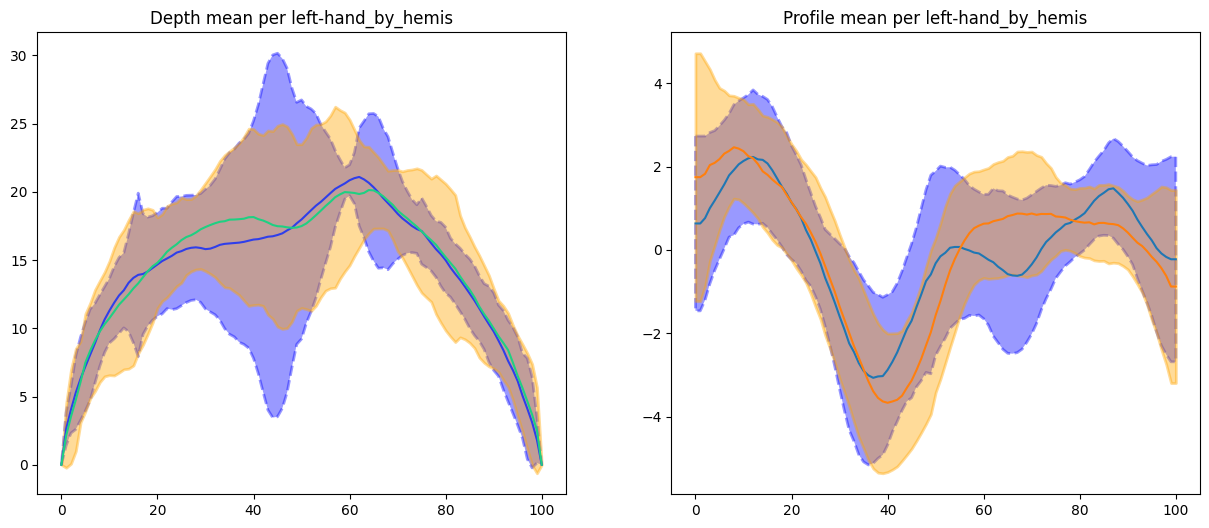

14.219718510177506 14.459173977929087


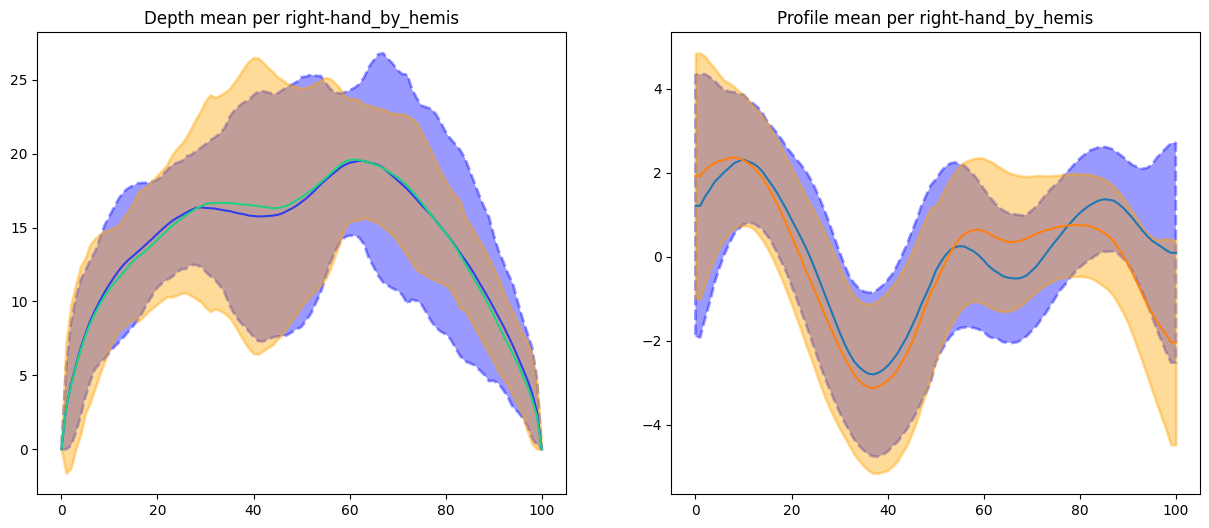

13.864919506108006 13.854041104671877


In [34]:
df_gby_hand = df_crit23_nanfree.groupby('Mvmt_hand_v11')

by_left_hand = df_gby_hand.get_group(1.0)
by_right_hand = df_gby_hand.get_group(2.0)

df_gby_lefthand_hemisp = by_left_hand.groupby('hemisphere')

# 1=left hand, 2=right hand
depth_mean_subgroup1_l, depth_mean_subgroup2_l, _, _, _, _ = visualize_bv_by('left-hand_by_hemis',df_gby_lefthand_hemisp, 'left', 'right')
plt.show()
print(np.mean(depth_mean_subgroup1_l), np.mean(depth_mean_subgroup2_l))

df_gby_righthand_hemisp = by_right_hand.groupby('hemisphere')

depth_mean_subgroup1_r, depth_mean_subgroup2_r, _, _, _, _= visualize_bv_by('right-hand_by_hemis',df_gby_righthand_hemisp, 'left', 'right')
plt.show()
print(np.mean(depth_mean_subgroup1_r), np.mean(depth_mean_subgroup2_r))

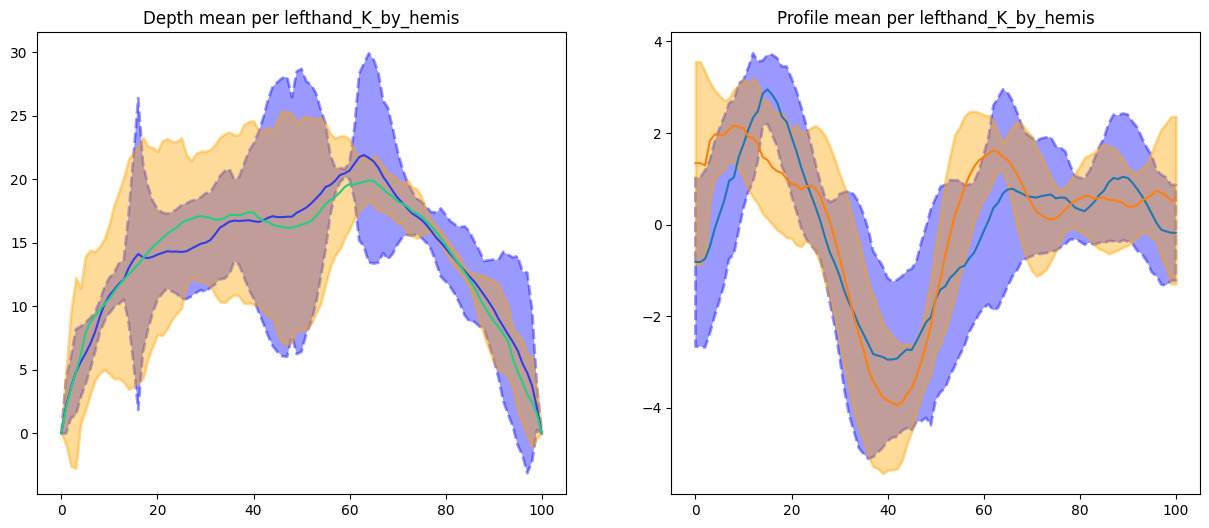

14.039166489123986 13.929954090457343


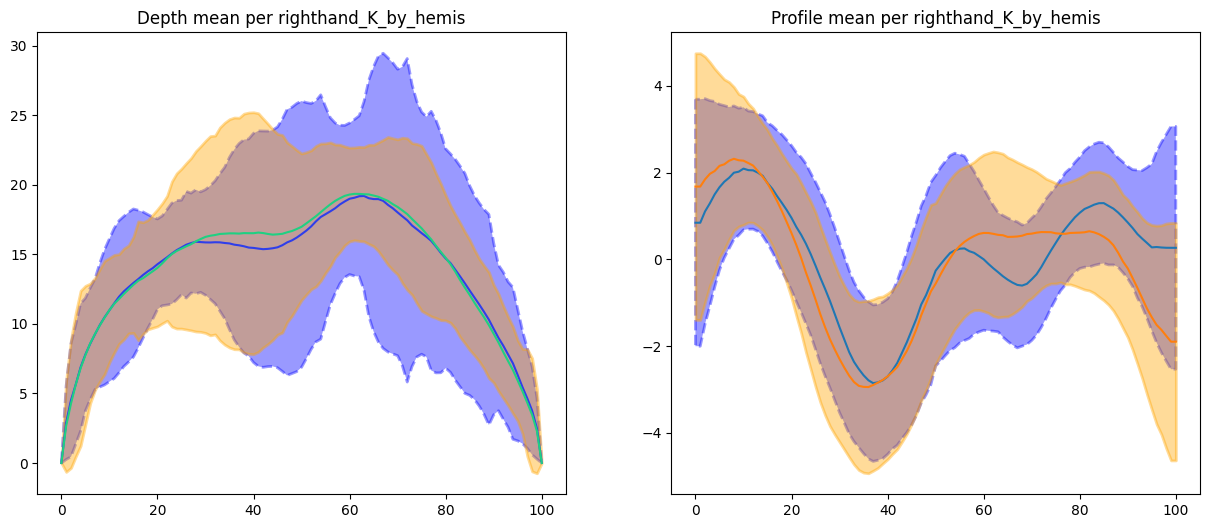

13.693389950684253 13.862095202141502


In [35]:
df_gby_lefthand_grisk = by_left_hand.groupby('HighRiskStatus_v11')

df_gby_lefthand_grisk_K = df_gby_lefthand_grisk.get_group('K')


df_gby_lefthand_grisk_K_hemis = df_gby_lefthand_grisk_K.groupby('hemisphere')


# 1=left hand, 2=right hand
depth_mean_subgroup1_l, depth_mean_subgroup2_l, _, _, _, _  = visualize_bv_by('lefthand_K_by_hemis',df_gby_lefthand_grisk_K_hemis, 'left', 'right')
plt.show()
print(np.mean(depth_mean_subgroup1_l), np.mean(depth_mean_subgroup2_l))

df_gby_righthand_grisk = by_right_hand.groupby('HighRiskStatus_v11')

df_gby_righthand_grisk_K = df_gby_righthand_grisk.get_group('K')


df_gby_righthand_grisk_K_hemis = df_gby_righthand_grisk_K.groupby('hemisphere')


# 1=left hand, 2=right hand
depth_mean_subgroup1_r, depth_mean_subgroup2_r, _, _, _, _ = visualize_bv_by('righthand_K_by_hemis',df_gby_righthand_grisk_K_hemis, 'left', 'right')
plt.show()
print(np.mean(depth_mean_subgroup1_r), np.mean(depth_mean_subgroup2_r))

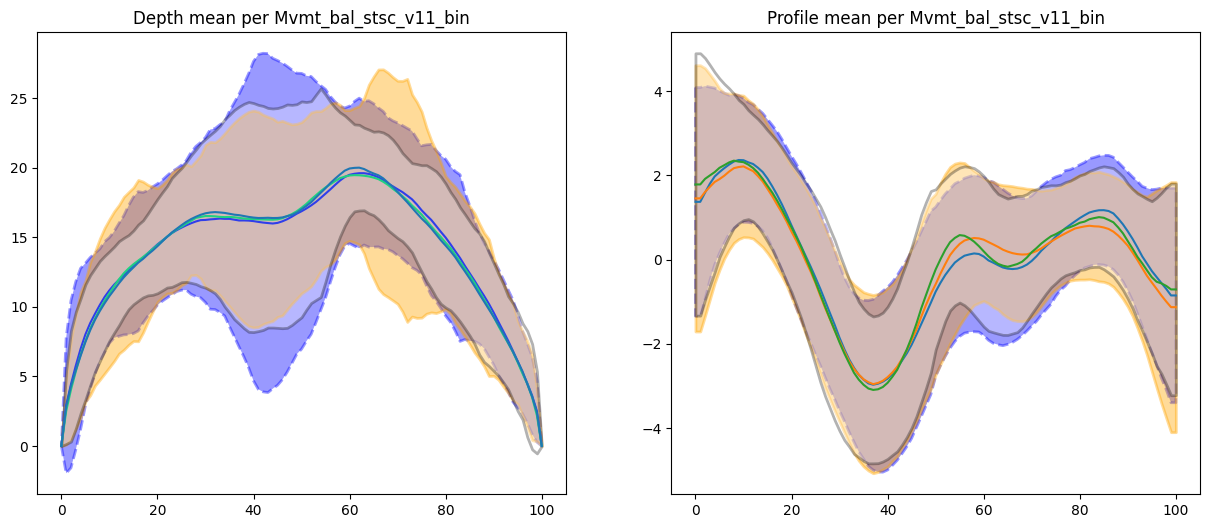

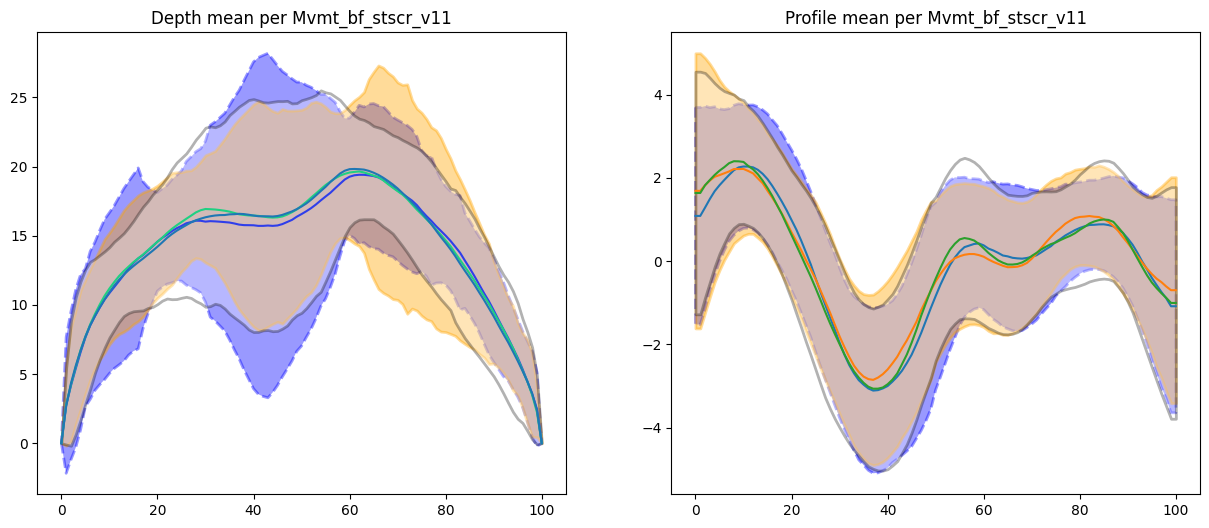

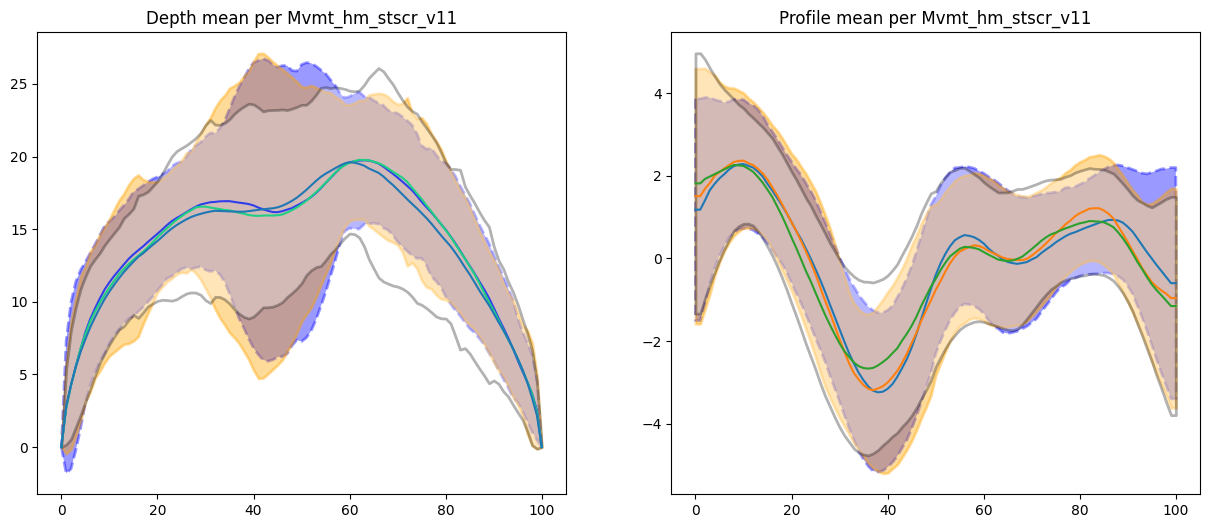

In [36]:
df_gby_mvmtbal_bin = df_crit23_nanfree.groupby('Mvmt_bal_stsc_v11_bin')
depth_m1, depth_m2, depth_m3, prof_m1, prof_m2, prof_m3 = visualize_bv_by('Mvmt_bal_stsc_v11_bin',df_gby_mvmtbal_bin, 'low', 'mid', 'high')
plt.show()

df_gby_mvmtbf_bin = df_crit23_nanfree.groupby('Mvmt_bf_stscr_v11_bin')
depth_m1, depth_m2, depth_m3, prof_m1, prof_m2, prof_m3 = visualize_bv_by('Mvmt_bf_stscr_v11',df_gby_mvmtbf_bin, 'low', 'mid', 'high')
plt.show()

df_gby_mvmthm_bin = df_crit23_nanfree.groupby('Mvmt_hm_stscr_v11_bin')
depth_m1, depth_m2, depth_m3, prof_m1, prof_m2, prof_m3 = visualize_bv_by('Mvmt_hm_stscr_v11',df_gby_mvmthm_bin, 'low', 'mid', 'high')
plt.show()

#'', '', 'Mvmt_hm_stscr_v11'

In [62]:
##################
# PERMUTATION TEST
##################

def permutation_test(data,n_permutations, n_wind, varbs):

    p_values_coord = np.array(varbs)
    count =0

    obverved_f = pd.DataFrame()

    for window in range(n_wind):

        print('\n window ',window)
            
        # Define the formula for the ANOVA model
        formula = f"w_{window} ~  HighRiskStatus_v11 + Sex_child_v11 + Mvmt_hand_v11 + Mvmt_bal_stsc_v11 + Mvmt_bf_stscr_v11 + Mvmt_hm_stscr_v11"


        # Fit the model using Ordinary Least Squares (OLS)
        model_observed = ols(formula, data=data).fit()

        # Perform ANOVA
        observed_anova_tbl = sm.stats.anova_lm(model_observed, typ=2)
        print('\nObserved Tests:\n', observed_anova_tbl)

        # Observed F-statistics
        obverved_f[f"w_{count}"] =  observed_anova_tbl['F']

        count += 1
        # Perform permutations
        #p_value_all_vars = []

    print(obverved_f)

    perm_max_table = pd.DataFrame(columns=varbs, index=range(0, n_permutations))
    
    for p in range(n_permutations):
        #print('permutation', p)
        permuation_arr = np.random.permutation(data.shape[0])
        #idx_perm, val_perm in enumerate(permuation_arr):

        for idx_var, val_var in enumerate(varbs):
            #print(val_var)
            f_var = []

            for window in range(n_wind):

                # Define the formula for the ANOVA model
                formula = f"w_{window} ~  HighRiskStatus_v11 + Sex_child_v11 + Mvmt_hand_v11 + Mvmt_bal_stsc_v11 + Mvmt_bf_stscr_v11 + Mvmt_hm_stscr_v11"

                data_to_perm = data.copy()

                data_to_perm[val_var] = data_to_perm[val_var].iloc[permuation_arr].values

                model = ols(formula, data=data_to_perm).fit()

                # Perform ANOVA
                anova_tbl = sm.stats.anova_lm(model, typ=2)

                # Return the F-statistic
                perm_fval = anova_tbl.at[val_var,'F']

                f_var.append(perm_fval)
            
            #print(f_var)
            #print(np.max(f_var))
            perm_max_table.at[p, val_var] = np.max(f_var)

    p_val_wind = pd.DataFrame()

    for w in range(n_wind):
        pval_var_tbl = []
        for v in varbs:
            signif = 0
            for p in range(n_permutations):
                if perm_max_table.loc[p, v] >= obverved_f.loc[v, f"w_{w}"]:
                    signif += 1
            pval_var_tbl.append(signif/n_permutations)
                
        p_val_wind[f"w_{w}"] = pval_var_tbl

    return obverved_f, perm_max_table, p_val_wind

In [63]:
# RIGHT HEMISPHERE PERMUTATION TEST

data_hem = df_crit23_nanfree.groupby("hemisphere")

# right hemisphere
data_byhem= data_hem.get_group("right")

# Convert categorical variables to 'category' type
data_byhem['HighRiskStatus_v11'] = data_byhem['HighRiskStatus_v11'].astype('category')
data_byhem['Sex_child_v11'] = data_byhem['Sex_child_v11'].astype('category')
data_byhem['Mvmt_hand_v11'] = data_byhem['Mvmt_hand_v11'].astype('category')


data = data_byhem

step_length = 10
window_length = 10
n_permutations = 10000
data_profile_allwindows = pd.DataFrame()
data_depth_allwindows = pd.DataFrame()

count =0
for i in range(15,80,step_length):
    feature_type='depth'
    column_to_modify = 'depth_peaks'
    # store mean of the window
    data_depth_allwindows[f"w_{count}"] = data[feature_type].apply(lambda x: np.mean(x[i:i+window_length]))

    # store mean of the window
    feature_type='profile'
    column_to_modify = 'prof_peaks'
    data_profile_allwindows[f"w_{count}"] = data[feature_type].apply(lambda x: np.mean(x[i:i+window_length]))

    count +=1

n_wind = data_depth_allwindows.shape[1]

#depth
data_w_wind = pd.concat([data, data_depth_allwindows], ignore_index=False, sort=False, axis=1)
varbs = ["HighRiskStatus_v11", "Sex_child_v11", "Mvmt_hand_v11", "Mvmt_bal_stsc_v11", \
                "Mvmt_bf_stscr_v11", "Mvmt_hm_stscr_v11"]

obverved_f_depthR, perm_max_table_depthR, p_val_wind_depthR = permutation_test(data_w_wind, n_permutations, n_wind = n_wind, varbs=varbs)

#profile
dependent_var_table = data_profile_allwindows
data_w_wind = pd.concat([data, data_profile_allwindows], ignore_index=False, sort=False, axis=1)

obverved_f_profR, perm_max_table_profR, p_val_wind_profR = permutation_test(data_w_wind, n_permutations, n_wind = n_wind, varbs=varbs)

/tmp/ipykernel_1067347/1677748077.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_byhem['HighRiskStatus_v11'] = data_byhem['HighRiskStatus_v11'].astype('category')
/tmp/ipykernel_1067347/1677748077.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_byhem['Sex_child_v11'] = data_byhem['Sex_child_v11'].astype('category')
/tmp/ipykernel_1067347/1677748077.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 


 window  0

Observed Tests:
                         sum_sq     df         F    PR(>F)
HighRiskStatus_v11    0.116546    2.0  0.015394  0.984726
Sex_child_v11        25.281391    1.0  6.678388  0.010719
Mvmt_hand_v11         1.890191    1.0  0.499317  0.480904
Mvmt_bal_stsc_v11    13.116403    1.0  3.464858  0.064656
Mvmt_bf_stscr_v11     3.724557    1.0  0.983887  0.322849
Mvmt_hm_stscr_v11     8.260741    1.0  2.182176  0.141728
Residual            564.047400  149.0       NaN       NaN

 window  1

Observed Tests:
                         sum_sq     df         F    PR(>F)
HighRiskStatus_v11    7.561700    2.0  0.758367  0.470230
Sex_child_v11        26.417175    1.0  5.298788  0.022726
Mvmt_hand_v11         5.762202    1.0  1.155789  0.284078
Mvmt_bal_stsc_v11    18.002249    1.0  3.610912  0.059333
Mvmt_bf_stscr_v11     1.724797    1.0  0.345962  0.557298
Mvmt_hm_stscr_v11    18.189491    1.0  3.648469  0.058042
Residual            742.841429  149.0       NaN       NaN

 window  2


In [64]:
perm_max_table_profR

,HighRiskStatus_v11,Sex_child_v11,Mvmt_hand_v11,Mvmt_bal_stsc_v11,Mvmt_bf_stscr_v11,Mvmt_hm_stscr_v11
0,2.24702,1.657171,2.121416,2.543129,1.280588,1.054305
1,1.489423,3.330409,2.607772,7.64808,3.577322,0.734831
2,2.702036,4.676092,2.306998,0.934999,0.663064,3.423623
3,2.081163,1.459491,1.086284,2.33452,1.238645,3.510724
4,4.763753,3.997039,1.325744,5.933262,2.999032,4.959984
...,...,...,...,...,...,...
9995,2.036209,8.76948,1.46524,0.736039,7.350637,4.121803
9996,2.328362,1.665056,2.274693,2.291255,0.308504,0.667151
9997,4.633702,0.824914,2.788585,4.299309,2.065902,2.536069
9998,0.932047,1.983759,3.260068,1.173833,1.583866,0.507261


In [66]:
p_val_wind_depthR

,w_0,w_1,w_2,w_3,w_4,w_5,w_6
0,1.0000,0.9607,0.9988,0.9993,0.8852,0.8895,0.9741
1,0.0609,0.1256,0.3721,0.9999,0.9999,0.0471,0.5528
2,0.9727,0.8291,0.2277,0.6012,0.6965,0.9840,0.8688
3,0.3075,0.2865,0.6847,0.9477,0.4350,0.9976,0.9087
4,0.8770,0.9915,0.9998,0.9626,0.4151,0.9995,0.9670
5,0.5633,0.2849,0.9999,0.9347,0.9756,0.5248,0.9986


In [67]:
p_val_wind_profR

,w_0,w_1,w_2,w_3,w_4,w_5,w_6
0,0.9521,0.9995,0.2348,1.0000,1.0000,0.9994,0.5443
1,0.7845,0.8980,0.4425,0.9978,0.6037,0.7997,0.0814
2,0.6809,0.3935,0.9517,0.2145,1.0000,0.7029,1.0000
3,1.0000,0.9382,0.9996,0.2469,0.8966,0.8495,0.9966
4,0.9113,0.9998,1.0000,0.9932,0.9998,0.9546,1.0000
5,0.7079,0.9979,0.0523,0.9145,1.0000,0.2790,0.8593


In [68]:
# LEFT HEMISPHERE PERMUTATION TEST

data_hem = df_crit23_nanfree.groupby("hemisphere")

# hemisphere
data_byhem= data_hem.get_group("left")

# Convert categorical variables to 'category' type
data_byhem['HighRiskStatus_v11'] = data_byhem['HighRiskStatus_v11'].astype('category')
data_byhem['Sex_child_v11'] = data_byhem['Sex_child_v11'].astype('category')
data_byhem['Mvmt_hand_v11'] = data_byhem['Mvmt_hand_v11'].astype('category')


data = data_byhem

step_length = 10
window_length = 10
n_permutations = 10000

data_profile_allwindows = pd.DataFrame()
data_depth_allwindows = pd.DataFrame()

count =0
for i in range(15,80,step_length):
    feature_type='depth'
    column_to_modify = 'depth_peaks'
    # store mean of the window
    data_depth_allwindows[f"w_{count}"] = data[feature_type].apply(lambda x: np.mean(x[i:i+window_length]))

    # store mean of the window
    feature_type='profile'
    column_to_modify = 'prof_peaks'
    data_profile_allwindows[f"w_{count}"] = data[feature_type].apply(lambda x: np.mean(x[i:i+window_length]))

    count +=1

n_wind = data_depth_allwindows.shape[1]

#depth
data_w_wind = pd.concat([data, data_depth_allwindows], ignore_index=False, sort=False, axis=1)
varbs = ["HighRiskStatus_v11", "Sex_child_v11", "Mvmt_hand_v11", "Mvmt_bal_stsc_v11", \
                "Mvmt_bf_stscr_v11", "Mvmt_hm_stscr_v11"]

obverved_f_depthL, perm_max_table_depthL, p_val_wind_depthL = permutation_test(data_w_wind, n_permutations, n_wind = n_wind, varbs=varbs)

#profile
dependent_var_table = data_profile_allwindows
data_w_wind = pd.concat([data, data_profile_allwindows], ignore_index=False, sort=False, axis=1)

obverved_f_profL, perm_max_table_profL, p_val_wind_profL = permutation_test(data_w_wind, n_permutations, n_wind = n_wind, varbs=varbs)


/tmp/ipykernel_1067347/3256706549.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_byhem['HighRiskStatus_v11'] = data_byhem['HighRiskStatus_v11'].astype('category')
/tmp/ipykernel_1067347/3256706549.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_byhem['Sex_child_v11'] = data_byhem['Sex_child_v11'].astype('category')
/tmp/ipykernel_1067347/3256706549.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 


 window  0

Observed Tests:
                         sum_sq     df         F    PR(>F)
HighRiskStatus_v11    7.769932    2.0  1.151442  0.318941
Sex_child_v11        17.427773    1.0  5.165314  0.024453
Mvmt_hand_v11         0.040396    1.0  0.011973  0.913014
Mvmt_bal_stsc_v11     9.340511    1.0  2.768379  0.098217
Mvmt_bf_stscr_v11     2.841515    1.0  0.842180  0.360238
Mvmt_hm_stscr_v11     2.018318    1.0  0.598197  0.440476
Residual            509.474129  151.0       NaN       NaN

 window  1

Observed Tests:
                         sum_sq     df         F    PR(>F)
HighRiskStatus_v11   25.710269    2.0  3.851294  0.023370
Sex_child_v11         6.460762    1.0  1.935592  0.166194
Mvmt_hand_v11         1.804632    1.0  0.540653  0.463303
Mvmt_bal_stsc_v11    29.162178    1.0  8.736753  0.003620
Mvmt_bf_stscr_v11     4.978755    1.0  1.491595  0.223873
Mvmt_hm_stscr_v11     7.084962    1.0  2.122597  0.147217
Residual            504.018942  151.0       NaN       NaN

 window  2


In [69]:
p_val_wind_depthL

,w_0,w_1,w_2,w_3,w_4,w_5,w_6
0,0.8729,0.1315,0.8722,0.8808,0.4073,1.0000,0.9998
1,0.1362,0.6350,1.0000,1.0000,0.6400,0.4717,0.8141
2,1.0000,0.9696,0.7644,0.1874,0.0224,0.9989,1.0000
3,0.4434,0.0265,0.9567,1.0000,0.7502,0.8970,1.0000
4,0.9145,0.7527,0.0627,0.3933,1.0000,0.9905,0.8806
5,0.9607,0.5818,0.8514,0.9946,0.8405,0.9999,0.9762


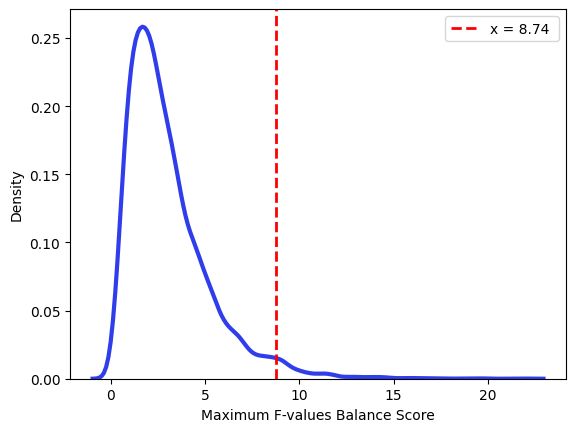

In [97]:
#fig = plt.subplots(1, 1, figsize=(10, 6))
sns.kdeplot(perm_max_table_depthL['Mvmt_bal_stsc_v11'], linewidth=3, color = '#2F3EEA')

# Add a vertical line at x = 2
plt.axvline(x=8.74 , color='red', linestyle='--', linewidth=2, label='x = 8.74 ')

# Add labels and title
plt.xlabel('Maximum F-values Balance Score')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()

In [70]:
p_val_wind_profL

,w_0,w_1,w_2,w_3,w_4,w_5,w_6
0,0.9893,0.9515,0.9969,1.0000,0.9612,0.9889,0.9998
1,0.9958,0.9966,0.6101,1.0000,0.1111,0.9998,0.3912
2,0.9994,0.9917,1.0000,1.0000,0.9947,1.0000,1.0000
3,0.9973,0.9586,0.7131,1.0000,0.9465,0.4291,0.9988
4,0.9201,0.9975,0.9879,0.9971,0.9999,1.0000,1.0000
5,0.7753,0.9701,0.8440,1.0000,0.9858,0.9990,0.9547


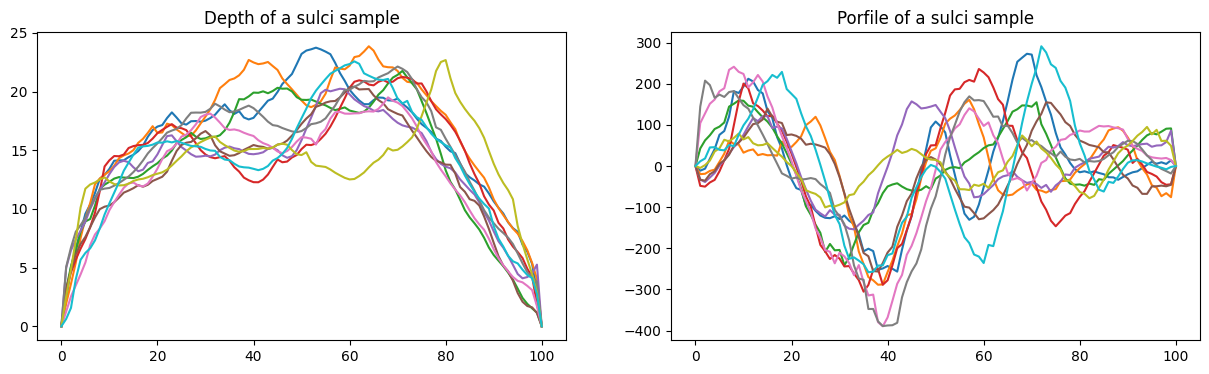

In [ ]:
%matplotlib inline

view_low = 0 # min 0
view_high = 101 # max 101
min = 100
max = 110
coord = np.linspace(0,100,101)

fig, ax = plt.subplots(1, 2, figsize=(15, 4))

""" Visualize depth """
for i in df_crit23_nanfree.index[min:max]:
    depth = df_crit23_nanfree.at[i,'depth']
    ax[0].plot(coord, depth)
ax[0].title.set_text("Depth of a sulci sample")

for i in df_crit23_nanfree.index[min:max]:
    prof = df_crit23_nanfree.at[i,'profile']
    ax[1].plot(coord, prof)
ax[1].title.set_text("Porfile of a sulci sample")